# <center> Entrevista Técnica
## <center> Allegro Microsystems
***
Autora: Daniela Feoli Grant<br>
Creación: 09.01.2024<br>
El siguiente código corresponde al problema a resolver para la entrevista técnica de 
Allegro Microsystems para el puesto de Test Engineer. Simula la funcionalidad de los IC de Allegro para ajustar
la corriente.

In [322]:
import random
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd

### Clase AllegroIC
- Recibe como argumento el valor deseado de corriente (*targ_current*)
- Contiene dos métodos:
    - **adjust_I** que se encarga de ajustar el valor de corriente lo más cercano posible a 2.5 uA y va actualizando el registro.
        - Argumentos:
            - *seed*: funciona de semilla para generar algún valor aleatorio de corriente inicial acotado entre 1 uA y 5 uA.
        - Retorno:
            - *current_init*: corriente inicial
            - *current*: corriente final
            - *reg*: valor del registro
    - **save2csv** que guarda los datos en formato CSV.
        - Argumentos:
            - *current_init*: corriente inicial
            - *current*: corriente final
            - *reg*: valor del registro
            - *filename*: nombre deseado del archivo, ej.: 'datos_ajuste'


In [323]:
class AllegroIC:
    def __init__(self, targ_current:float, min_in:float, max_in:float, step:float, reg_bits:int):
        self.targ_current = targ_current
        self.min_in = min_in
        self.max_in = max_in
        self.step = step
        self.reg_bits = reg_bits
        
    def __str__(self):
        return f"Target current is: {self.targ_current}."

    def adjust_I(self, seed:int):
        self.seed = random.seed(seed)                 # Utiliza semillas para generar los valores aleatorios
        current_init = random.uniform(self.min_in, self.max_in)          # Crea valores pseudo-aleatorios entre 1e-6 y 5e-6
        current_diff = self.targ_current - current_init
        current = 0
        reg = 0

        print("La corriente inicial es de",current_init)

                                            # Valor default del registro es 0. Caso en el que no es necesario ajustar corriente.
        if -self.step/2 < current_diff < self.step/2:         
            reg = 0
            current = current_init

        elif current_diff <= -self.step/2:                # Resta 0.1 uA y actualiza el registro (8 <= reg <= 15)
            reg = round(abs(current_diff) / self.step, 0) + (self.reg_bits/2 - 1)

            if reg >= self.reg_bits:
                reg = self.reg_bits - 1

            current = current_init - (reg - (self.reg_bits/2 - 1)) * self.step
            print("La corriente final es de",current," A.\nEl registro es:", reg)

        elif current_diff >= self.step/2:                 # Suma 0.1 uA y actualiza el registro (1 <= reg <= 7)  
            reg = round(abs(current_diff) / self.step, 0)
            
            if reg >= self.reg_bits/2:
                reg = self.reg_bits/2 - 1

            current = current_init + (reg * self.step)
            print("La corriente final es de",current," A.\nEl registro es:", reg," La diferencia es de ",current_diff)

        return current_init, current, reg
        
        

    

Se instancia un objeto de la clase AllegroIC con una corriente deseada de 2.5 uA. Del mismo modo, se crea un arreglo *seed_arr* que contiene 10k semillas para probar valores aleatorios de corriente inicial.

In [324]:
aic1 = AllegroIC(targ_current=2.5e-6, min_in=1e-6, max_in=5e-6, step=0.1e-6, reg_bits=16)
seed_arr = range(0,9999,1)
filename = 'datossssss'

Se itera el método de adjust_I para todas las semillas. Se puede observar el resultado en terminal así como proceder a abrir el CSV creado en carpeta.

In [325]:
init_arr = []
current_arr = []
reg_arr = []

for i in seed_arr:
    [init,current,reg]=aic1.adjust_I(i)
    init_arr.append(init)
    current_arr.append(current)
    reg_arr.append(int(reg))

data = list(zip(init_arr,current_arr,reg_arr))
df = pd.DataFrame(data,
                  columns = ['Corriente inicial (A)','Corriente final (A)','Valor del registro (decimal)'])

df.to_csv(filename+'.csv')


La corriente inicial es de 4.377687406100193e-06
La corriente final es de 3.577687406100193e-06  A.
El registro es: 15
La corriente inicial es de 1.537456976449605e-06
La corriente final es de 2.237456976449605e-06  A.
El registro es: 7.0  La diferencia es de  9.625430235503952e-07
La corriente inicial es de 4.824137087556998e-06
La corriente final es de 4.024137087556998e-06  A.
El registro es: 15
La corriente inicial es de 1.9518585083675654e-06
La corriente final es de 2.4518585083675653e-06  A.
El registro es: 5.0  La diferencia es de  5.481414916324348e-07
La corriente inicial es de 1.944192358949738e-06
La corriente final es de 2.544192358949738e-06  A.
El registro es: 6.0  La diferencia es de  5.55807641050262e-07
La corriente inicial es de 3.491606779558808e-06
La corriente final es de 2.691606779558808e-06  A.
El registro es: 15
La corriente inicial es de 4.173360335046652e-06
La corriente final es de 3.3733603350466524e-06  A.
El registro es: 15
La corriente inicial es de 2.2

## Resultados
Se grafican los histogramas en donde se observa con claridad los valores de corriente ajustados alrededor de 2.5 uA.

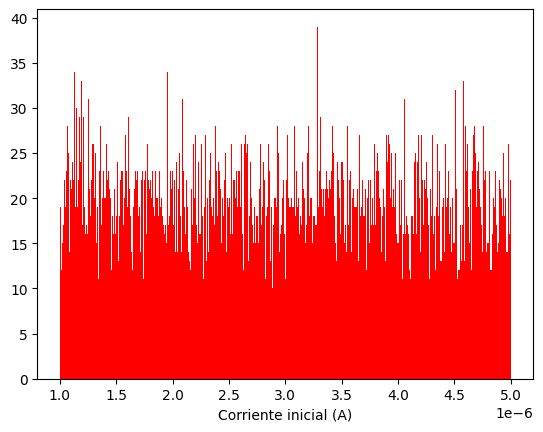

In [326]:
plt.hist(init_arr,color='r',bins=500)
plt.xlabel('Corriente inicial (A)')
plt.show()


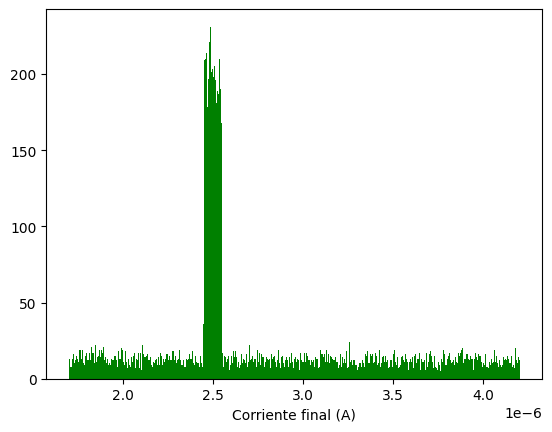

In [327]:
plt.hist(current_arr,color='g',bins=500)
plt.xlabel('Corriente final (A)')
plt.show()

El CSV muestra los siguientes datos:

In [328]:
pd.options.display.float_format = '{:.9f}'.format
df = pd.read_csv(filename+'.csv')
df.head(10)

,Unnamed: 0,Corriente inicial (A),Corriente final (A),Valor del registro (decimal)
0,0,0.000004378,0.000003578,15
1,1,0.000001537,0.000002237,7
2,2,0.000004824,0.000004024,15
3,3,0.000001952,0.000002452,5
4,4,0.000001944,0.000002544,6
5,5,0.000003492,0.000002692,15
6,6,0.000004173,0.000003373,15
7,7,0.000002295,0.000002495,2
8,8,0.000001907,0.000002507,6
9,9,0.000002852,0.000002452,11
